In [1]:
import torch
import torchvision
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt

import numpy as np

# Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:  
- изменение слоёв и их количества;  
- изменение метода оптимизации;   
- изменение процесса обучения;   
- для продвинутых: преобразование данных.


In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)


image, label = train_dataset[5]
print (image.size())
print (label)

torch.Size([3, 32, 32])
1


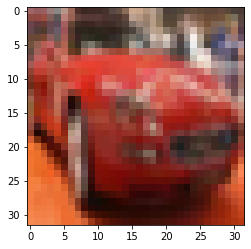

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy());

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=256, 
                                           shuffle=True)

In [5]:
t = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor()])

In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=t)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                         shuffle=False)

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
%%time
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 127 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   128] loss: 0.129
[2,     1] loss: 0.001
[2,   128] loss: 0.107
[3,     1] loss: 0.001
[3,   128] loss: 0.100
[4,     1] loss: 0.001
[4,   128] loss: 0.095
[5,     1] loss: 0.001
[5,   128] loss: 0.091
[6,     1] loss: 0.001
[6,   128] loss: 0.088
[7,     1] loss: 0.001
[7,   128] loss: 0.085
[8,     1] loss: 0.001
[8,   128] loss: 0.082
[9,     1] loss: 0.001
[9,   128] loss: 0.080
[10,     1] loss: 0.001
[10,   128] loss: 0.078
Training is finished!
CPU times: user 1min 27s, sys: 20.3 ms, total: 1min 27s
Wall time: 1min 27s


In [13]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

           cat           ship           ship          plane           frog           frog            car           frog            cat            car


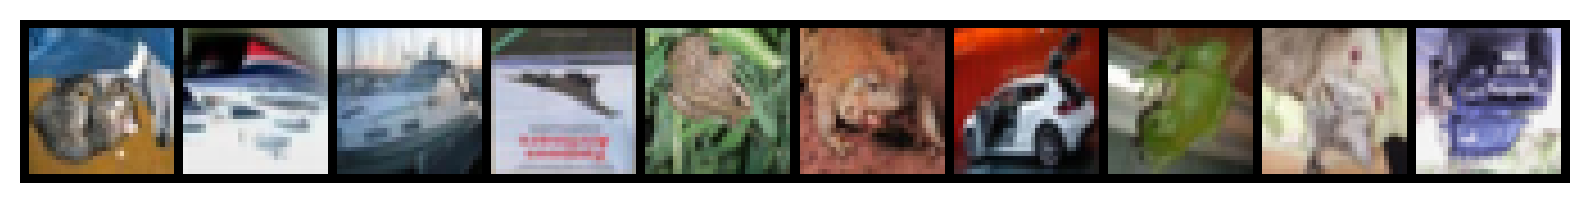

In [14]:
outputs = net(images.to(device))
imgs = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(10,5), dpi=200)
plt.imshow(imgs.permute(1, 2, 0).numpy())
plt.axis('off')
print( ' '.join('%14s' % classes[labels[j]] for j in range(10)))

# Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [15]:
linear = nn.Linear(2, 2)

In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [17]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [18]:
for epochs in range(10):
    optimizer.zero_grad()
    pred = linear(x)
    loss = criterion(pred, y)
    print('loss in step ', epochs+1,' = ', loss.item())
    loss.backward()
    optimizer.step()


loss in step  1  =  2.3662612438201904
loss in step  2  =  2.169921636581421
loss in step  3  =  1.9898731708526611
loss in step  4  =  1.8247637748718262
loss in step  5  =  1.673354983329773
loss in step  6  =  1.5345089435577393
loss in step  7  =  1.4071836471557617
loss in step  8  =  1.290423035621643
loss in step  9  =  1.1833505630493164
loss in step  10  =  1.0851624011993408


In [19]:
pred.type()

'torch.FloatTensor'

# Переписать эту программу на PyTorch: 
![image.png](image.png)

In [20]:
x = torch.randn((28, 28, 28))
y = torch.randint(0, 10, (28,))

# Вариант 1

In [21]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x
    
model = Model()

In [23]:
print(model)

Model(
  (flatten): Flatten()
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [24]:
for epochs in range(10):
    optimizer.zero_grad()
    pred = model(x)
    loss = criterion(pred, y)
    print('loss in step ', epochs+1,' = ', loss.item())
    loss.backward()
    optimizer.step()


loss in step  1  =  2.3130242824554443
loss in step  2  =  1.804237723350525
loss in step  3  =  1.4996167421340942
loss in step  4  =  1.463677167892456
loss in step  5  =  1.4612914323806763
loss in step  6  =  1.4613467454910278
loss in step  7  =  1.4611560106277466
loss in step  8  =  1.461151123046875
loss in step  9  =  1.4611507654190063
loss in step  10  =  1.4611501693725586


# Вариант 2

In [25]:
model_2 = nn.Sequential(
     nn.Flatten(1),
     nn.Linear(28 * 28, 128),
     nn.ReLU(), 
     nn.Dropout(0.2),
     nn.Linear(128, 10),
     nn.Softmax(dim=1)
 )


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)

In [28]:
for epochs in range(10):
    optimizer.zero_grad()
    pred = model_2(x)
    loss = criterion(pred, y)
    print('loss in step ', epochs+1,' = ', loss.item())
    loss.backward()
    optimizer.step()


loss in step  1  =  2.301652431488037
loss in step  2  =  1.7564765214920044
loss in step  3  =  1.484951138496399
loss in step  4  =  1.462500810623169
loss in step  5  =  1.4614086151123047
loss in step  6  =  1.4611577987670898
loss in step  7  =  1.4611605405807495
loss in step  8  =  1.4611618518829346
loss in step  9  =  1.4612210988998413
loss in step  10  =  1.4611507654190063
